In [1]:
# Title: DMRG Ground State Search and Compression Algorithms
# Author: Aaron Sander
# Date: March-May 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of the Density Matrix Renormalization Group (DMRG)
# for the ground state search of a given Hamiltonian as an MPO as well as
# for compressing an arbitrary quantum state which has relevant applications
# in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [3]:
######################### IMPORTS #############################################
from canonical_forms import *
from compression import *
from contractions import *
import initializations as init
from metrics import *
#import machine_learning as ML
import activation_functions as act

import ground_state_search as gnd

import numpy as np
import math

# Ground State Search
This section looks for the ground state of the Ising Model with given parameters as accurately as a given threshold.

In [4]:
MPO = init.initialize_quantum_ising_MPO(num_sites=3, J=1, g=1)

Initial Energy: -1.9653533414805406
Energy: -3.1052598997056937 BondDim: 1
Energy: -3.1593585836185345 BondDim: 1
Energy: -3.16211176388207 BondDim: 1
Energy: -3.1622706661708038 BondDim: 1
Energy: -3.493959207434934 BondDim: 2
Energy: -3.4939592074349344 BondDim: 2
Energy: -3.493959207434935 BondDim: 2


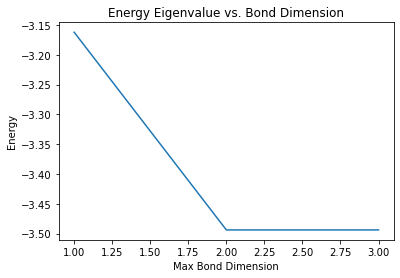

In [5]:
E, V, max_bond_dim = gnd.ground_state_search(MPO, threshold=1e-3, plot=1)

# Compression
This section converts an arbitrary n-bit string into an MPS and compresses it into one with a lower bond dimension.
The metrics used are cosine similarity (0 worst, 1 perfect), loss (1-cosSim), and Euclidean distance (-2 worst, 0 best)

In [6]:
data = init.initialize_random_normed_vector(length=1024)

In [7]:
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

In [8]:
compressions, dist, sim = compress(raw_state, threshold=1e-3, plot=0)

Sim: 0.8753654809502284 Dist: 0.49926850301170106 BondDim: 1
Sim: 0.8807452657324966 Dist: 0.48837431191147884 BondDim: 2
Sim: 0.8877158545687343 Dist: 0.4738863691461609 BondDim: 3
Sim: 0.8979755802623951 Dist: 0.4517176545976587 BondDim: 4
Sim: 0.9039866777874078 Dist: 0.4382084486008765 BondDim: 5
Sim: 0.9199926906762357 Dist: 0.4000182728920398 BondDim: 6
Sim: 0.9295243602899408 Dist: 0.3754347871736463 BondDim: 7
Sim: 0.940103708779148 Dist: 0.3461106505753708 BondDim: 8
Sim: 0.9468202107900965 Dist: 0.32612816256773763 BondDim: 9
Sim: 0.9536802884194192 Dist: 0.3043672504741003 BondDim: 10
Sim: 0.9611677360306716 Dist: 0.2786835623761455 BondDim: 11
Sim: 0.9677147912674605 Dist: 0.25410709841537654 BondDim: 12
Sim: 0.9726872723269138 Dist: 0.2337208919762514 BondDim: 13
Sim: 0.9776077472932626 Dist: 0.21162349919958034 BondDim: 14
Sim: 0.9831919233077 Dist: 0.1833470844725962 BondDim: 15
Sim: 0.9871143833620966 Dist: 0.16053421216615407 BondDim: 16
Sim: 0.989375575696487 Dist: 0.

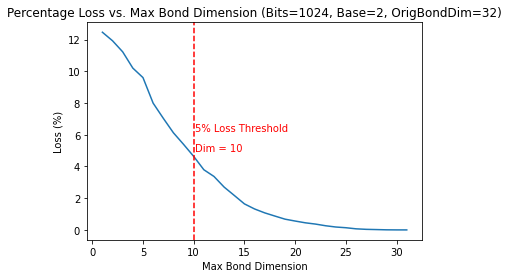

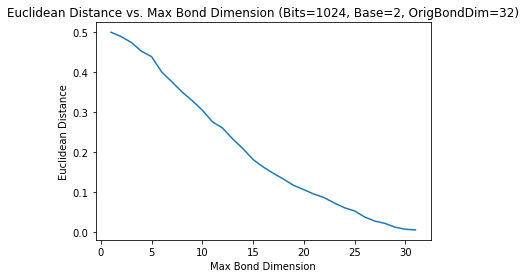

In [9]:
compressions, dist, sim = compress(raw_state, threshold=1e-3, plot=1)